In [4]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

co2 = pd.read_csv("./co2.csv")
co2.index = pd.date_range('1-1-1959', periods=co2.shape[0], freq='M')
co2

,x
1959-01-31,315.42
1959-02-28,316.31
1959-03-31,316.50
1959-04-30,317.56
1959-05-31,318.13
...,...
1997-08-31,362.57
1997-09-30,360.24
1997-10-31,360.83
1997-11-30,362.49


In [5]:
train = co2.iloc[:co2.shape[0]-12]
test = co2.iloc[co2.shape[0]-12:]

In [12]:
model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,2,12))

In [16]:
res = model.fit(disp=False)
#print(res.summary())

In [17]:
prediction = res.predict(start=test.index[0], end=test.index[-1])

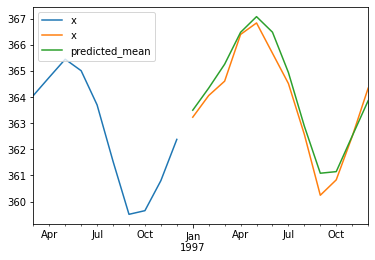

In [18]:
pd.concat([train[-10:], test, prediction], axis=1).plot();